### Notebook to process benchmar results

Please run this notebook after running all the benchmarks and storing them in the `results` dir. This will export them in the desired format for the single node benchmark plots of [qdrant.tech/benchmarks](https://qdrant.tech/benchmarks)

In [186]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [187]:
with open('results.json', 'r') as file:
    data = json.load(file)
df = pd.json_normalize(data)
#print(df)

In [188]:
def get_filtered_data(df, dataset_name, parallel, cols):
    return df[df['dataset_name']==dataset_name][df['parallel']==parallel][cols]

def draw_rps(df, dataset_name, parallel):
    df = get_filtered_data(df, dataset_name, parallel, ['mean_precisions', 'rps', 'engine_name', 'setup_name', 'engine_params.ef'])
    df = df.sort_values(by='mean_precisions')
    #print(df)
    title = "RPS - Precisions" + "  ( dataset :  " + dataset_name + " ," + "  parallel :  " + str(parallel) + " )"
    fig = px.line(df, x='mean_precisions', y='rps', color='engine_name', markers=True, title=title)
    fig.update_xaxes(range=[0.65, 1.0])
    fig.update_traces(textposition="bottom right")
    fig.show()

def draw_avg_latency(df, dataset_name, parallel):
    df = get_filtered_data(df, dataset_name, parallel, ['mean_precisions', 'mean_time', 'engine_name', 'setup_name', 'engine_params.ef'])
    df = df.sort_values(by='mean_precisions')
    #print(df)
    title = "Mean Time - Precisions" + "  ( dataset :  " + dataset_name + " ," + "  parallel :  " + str(parallel) + " )"
    fig = px.line(df, x='mean_precisions', y='mean_time', color='engine_name', markers=True, title=title)
    fig.update_xaxes(range=[0.65, 1.0])
    fig.update_traces(textposition="bottom right")
    fig.show()

def draw_p95_latency(df, dataset_name, parallel):
    df = get_filtered_data(df, dataset_name, parallel, ['mean_precisions', 'p95_time', 'engine_name', 'setup_name', 'engine_params.ef'])
    df = df.sort_values(by='mean_precisions')
    #print(df)
    title = "P95 Time - Precisions" + "  ( dataset :  " + dataset_name + " ," + "  parallel :  " + str(parallel) + " )"
    fig = px.line(df, x='mean_precisions', y='p95_time', color='engine_name', markers=True, title=title)
    fig.update_xaxes(range=[0.65, 1.0])
    fig.update_traces(textposition="bottom right")
    fig.show()
    
def draw_index_time(df, dataset_name, parallel):
    df = get_filtered_data(df, dataset_name, parallel, ['setup_name', 'total_upload_time', 'engine_name'])
    df = df.sort_values(by='total_upload_time')
    #print(df)
    title = "Total Upload Time - Precisions" + "  ( dataset :  " + dataset_name + " ," + "  parallel :  " + str(parallel) + " )"
    fig = px.line(df, x='setup_name', y='total_upload_time', color='engine_name', markers=True, title=title)
    #fig.update_xaxes(range=[0.65, 1.0])
    fig.update_traces(textposition="bottom right")
    fig.show()

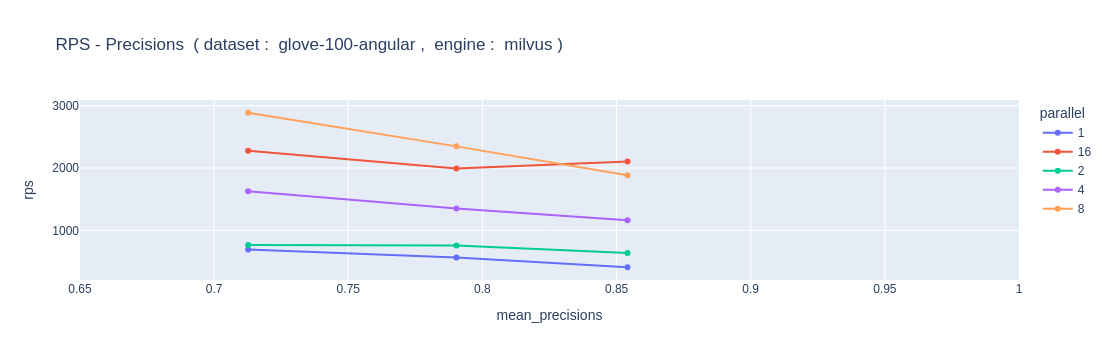

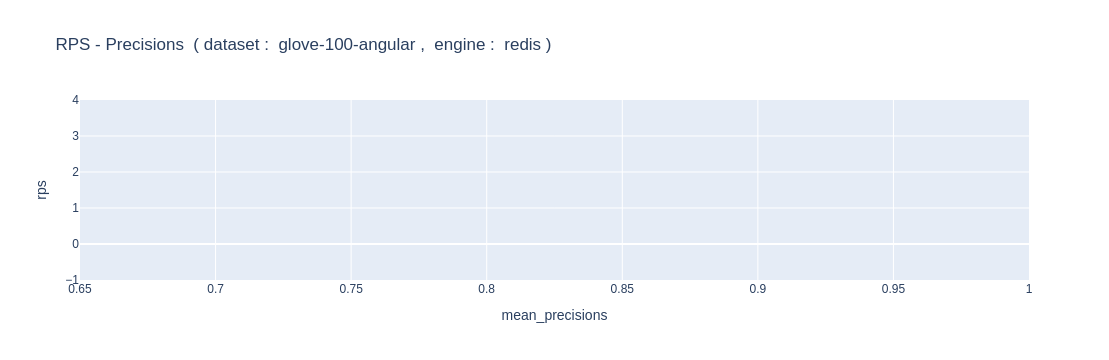

In [189]:
def get_filtered_data(df, dataset_name, engine_name, cols):
    return df[df['dataset_name']==dataset_name][df['engine_name']==engine_name][cols]

def draw_rps(df, dataset_name, engine_name):
    df = get_filtered_data(df, dataset_name, engine_name, ['mean_precisions', 'rps', 'engine_name', 'parallel', 'setup_name', 'engine_params.ef'])
    df = df.sort_values(by='mean_precisions')
    #print(df)
    title = "RPS - Precisions" + "  ( dataset :  " + dataset_name + " ," + "  engine :  " + engine_name + " )"
    fig = px.line(df, x='mean_precisions', y='rps', color='parallel', markers=True, title=title)
    fig.update_xaxes(range=[0.65, 1.0])
    fig.update_traces(textposition="bottom right")
    fig.show()

dataset = "glove-100-angular"
parallel = 100

draw_rps(df, dataset, "milvus")
draw_rps(df, dataset, "redis")
# draw_rps(df, dataset, "qdrant")


     mean_precisions          rps engine_name  parallel          setup_name
50          0.755775   762.013977   milvus_x1         1  milvus-m-16-ef-128
116         0.874623   525.032101   qdrant_x1         1  qdrant-m-16-ef-128
148         0.712406   780.618436    redis_x1         1   redis-m-16-ef-128
124         0.874623   920.898660   qdrant_x1         2  qdrant-m-16-ef-128
156         0.712406  1488.228377    redis_x1         2   redis-m-16-ef-128
62          0.755775  1163.675007   milvus_x1         2  milvus-m-16-ef-128
126         0.874623  1702.532265   qdrant_x1         4  qdrant-m-16-ef-128
84          0.755775  2134.016236   milvus_x1         4  milvus-m-16-ef-128
158         0.712406  1868.773821    redis_x1         4   redis-m-16-ef-128
96          0.755775  2524.999062   milvus_x1         6  milvus-m-16-ef-128
160         0.712406  1939.053757    redis_x1         8   redis-m-16-ef-128
128         0.874623  2236.591972   qdrant_x1         8  qdrant-m-16-ef-128
98          

/tmp/ipykernel_1112526/2230433198.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



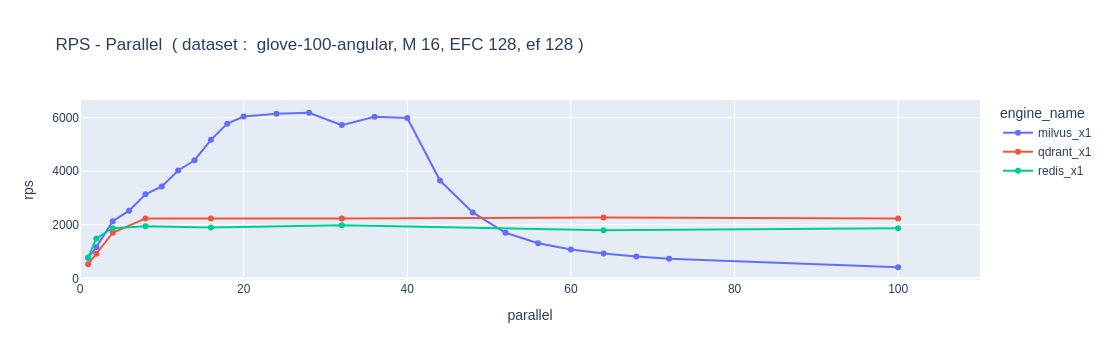

/tmp/ipykernel_1112526/2230433198.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



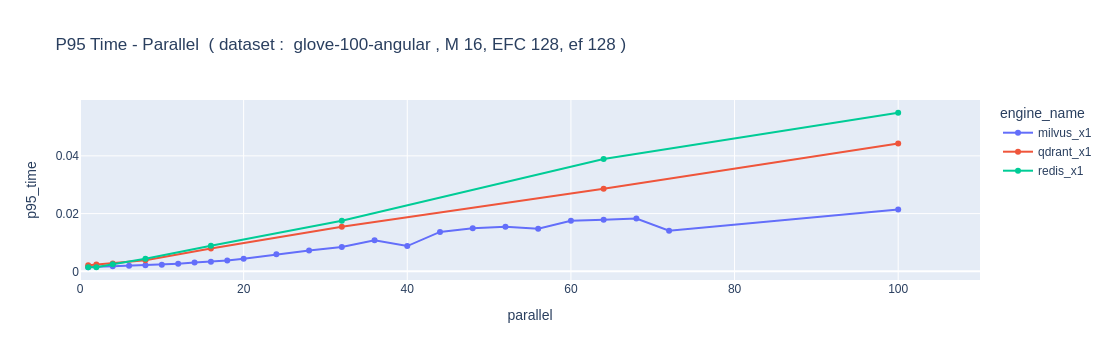

     mean_precisions          rps engine_name  parallel          setup_name
51          0.883625   450.167916   milvus_x1         1  milvus-m-16-ef-128
117         0.963154   324.304882   qdrant_x1         1  qdrant-m-16-ef-128
149         0.854375   473.109861    redis_x1         1   redis-m-16-ef-128
157         0.854375   772.784931    redis_x1         2   redis-m-16-ef-128
73          0.883625   759.455968   milvus_x1         2  milvus-m-16-ef-128
125         0.963154   566.000154   qdrant_x1         2  qdrant-m-16-ef-128
159         0.854375   759.282678    redis_x1         4   redis-m-16-ef-128
95          0.883625  1173.850036   milvus_x1         4  milvus-m-16-ef-128
127         0.963154   776.469809   qdrant_x1         4  qdrant-m-16-ef-128
97          0.883625  1538.293593   milvus_x1         6  milvus-m-16-ef-128
99          0.883625  1858.735640   milvus_x1         8  milvus-m-16-ef-128
129         0.963154   795.177204   qdrant_x1         8  qdrant-m-16-ef-128
161         

/tmp/ipykernel_1112526/2230433198.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



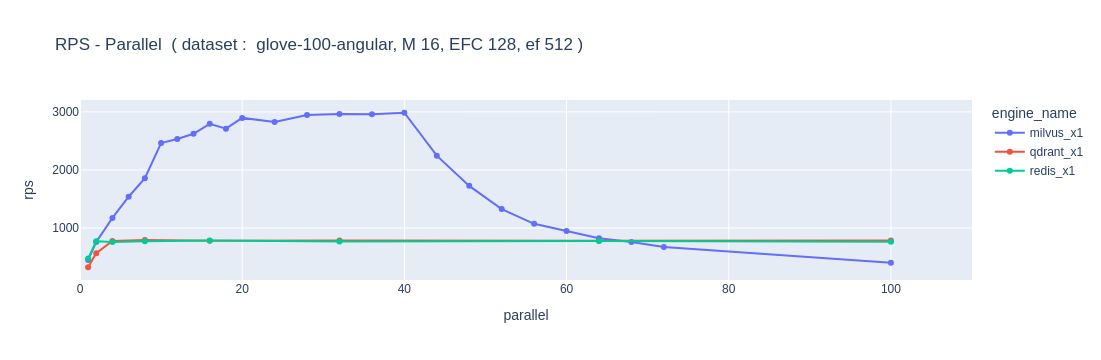

/tmp/ipykernel_1112526/2230433198.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



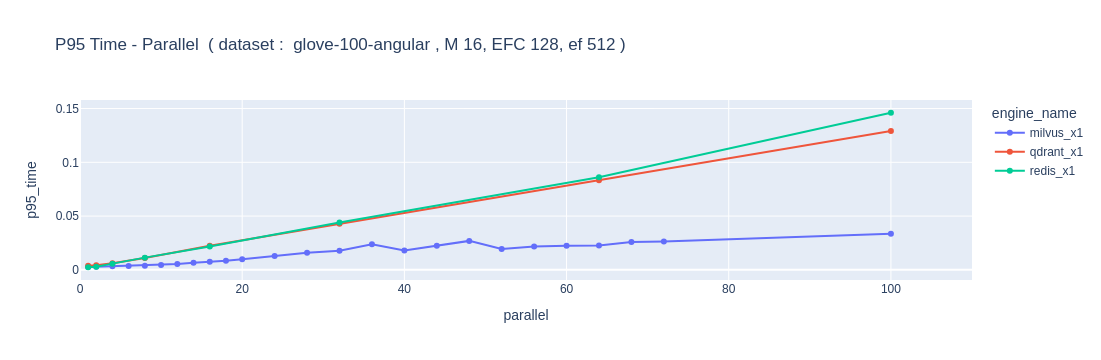

In [150]:
def get_filtered_data(df, dataset_name, ef, cols):
    return df[df['dataset_name']==dataset_name][df['engine_params.ef']==ef][cols]

def draw_rps(df, dataset_name, ef):
    df = get_filtered_data(df, dataset_name, ef, ['mean_precisions', 'rps', 'engine_name', 'parallel', 'setup_name'])
    df = df.sort_values(by='parallel')
    print(df)
    title = "RPS - Parallel" + "  ( dataset :  " + dataset_name + ", M 16, EFC 128, ef " + str(ef) + " )"
    fig = px.line(df, x='parallel', y='rps', color='engine_name', markers=True, title=title)
    fig.update_xaxes(range=[0, 110])
    #fig.update_yaxes(range=[0, 4000])
    fig.update_traces(textposition="bottom right")
    fig.show()
    
def draw_p95_latency(df, dataset_name, ef):
    df = get_filtered_data(df, dataset_name, ef, ['mean_precisions', 'p95_time', 'engine_name', 'parallel', 'setup_name', 'engine_params.ef'])
    df = df.sort_values(by='parallel')
    #print(df)
    title = "P95 Time - Parallel" + "  ( dataset :  " + dataset_name + " , M 16, EFC 128, ef " + str(ef) + " )"
    fig = px.line(df, x='parallel', y='p95_time', color='engine_name', markers=True, title=title)
    fig.update_xaxes(range=[0, 110])
    fig.update_traces(textposition="bottom right")
    fig.show()
    
dataset = "glove-100-angular"
#dataset = "dbpedia-openai-1M-1536-angular"

draw_rps(df, dataset, 128)
draw_p95_latency(df, dataset, 128)
draw_rps(df, dataset, 512)
draw_p95_latency(df, dataset, 512)